In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from keras.preprocessing import sequence 
from keras.datasets import imdb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Embedding, Dropout, SimpleRNN

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

2022-12-12 12:30:57.450128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 12:30:57.642541: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kaygun/local/lib
2022-12-12 12:30:57.642570: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-12 12:30:58.471913: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared obj

# Airline Passengers

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<AxesSubplot: >

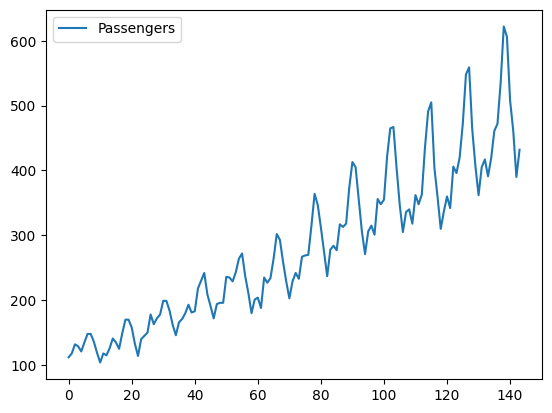

In [3]:
data.plot()

In [4]:
def load_data(data,T):
    N = data.shape[0]
    raw = data.to_numpy().reshape(N,1,)
    Y_train = raw[1:N-T]
    X_train = raw[:N-T-1]
    Y_test = raw[N-T:]
    X_test = raw[N-T-1:N-1]
    return X_train,X_test,Y_train,Y_test

In [5]:
T = 15
X_train,X_test,Y_train,Y_test = load_data(data['Passengers'], T)

In [6]:
model = Sequential()
model.add(LSTM(24,input_shape = (1,1),recurrent_dropout = 0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

2022-12-12 12:31:00.373907: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kaygun/local/lib
2022-12-12 12:31:00.373934: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-12 12:31:00.373955: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ada): /proc/driver/nvidia/version does not exist
2022-12-12 12:31:00.374194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.fit(X_train,Y_train,epochs=10,batch_size=10,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/10
13/13 [==============================] - 0s 20ms/step - loss: 2562.2632 - mse: 2562.2632 - val_loss: 10848.1982 - val_mse: 10848.1982
Epoch 2/10
13/13 [==============================] - 0s 14ms/step - loss: 2008.6326 - mse: 2008.6326 - val_loss: 10654.8232 - val_mse: 10654.8232
Epoch 3/10
13/13 [==============================] - 0s 15ms/step - loss: 2134.9761 - mse: 2134.9761 - val_loss: 9923.7900 - val_mse: 9923.7900
Epoch 4/10
13/13 [==============================] - 0s 11ms/step - loss: 2342.3289 - mse: 2342.3289 - val_loss: 8443.0186 - val_mse: 8443.0186
Epoch 5/10
13/13 [==============================] - 0s 18ms/step - loss: 2394.2417 - mse: 2394.2417 - val_loss: 9065.5811 - val_mse: 9065.5811
Epoch 6/10
13/13 [==============================] - 0s 13ms/step - loss: 2136.2202 - mse: 2136.2202 - val_loss: 8498.3711 - val_mse: 8498.3711
Epoch 7/10
13/13 [==============================] - 0s 12ms/step - loss: 1957.5540 - mse: 1957.5540 - val_loss: 9764.5850 - val_mse: 9764.

In [22]:
Y_pred = model.predict(X_test).reshape(T)
res = pd.DataFrame({'X_test': X_test.reshape(T),
                    'Y_test': Y_test.reshape(T), 
                    'Y_pred': Y_pred.reshape(T)})
res

1/1 [==============================] - 0s 51ms/step


,X_test,Y_test,Y_pred
0,463,407,400.534851
1,407,362,385.322205
2,362,405,366.333679
3,405,417,384.640686
4,417,391,388.558594
5,391,419,379.462830
6,419,461,389.172668
7,461,472,400.098633
8,472,535,402.415100
9,535,622,412.403595


<AxesSubplot: >

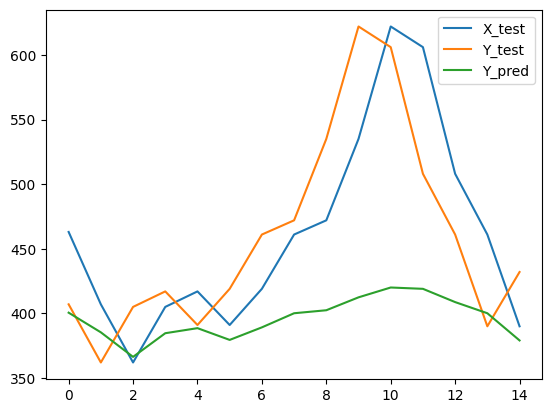

In [23]:
res.plot()

In [24]:
model.evaluate(X_test, Y_test, batch_size = 128)

1/1 [==============================] - 0s 59ms/step - loss: 8312.2773 - mse: 8312.2773


[8312.27734375, 8312.27734375]